In [1]:
import numpy as np
import flammkuchen as fk
import os
import random
import cv2
import matplotlib.pyplot as plt
import json

data = fk.load("rectanglesdsss.sec")
gt = data['ground_truth']
pred = data['predicted']

In [2]:
# Calculate the area of each rectangle in the ground truth list
gt_rect_area = [rect[2] * rect[3] for rect in gt]
pred_rect_area =  [rect[2] * rect[3] for rect in pred]

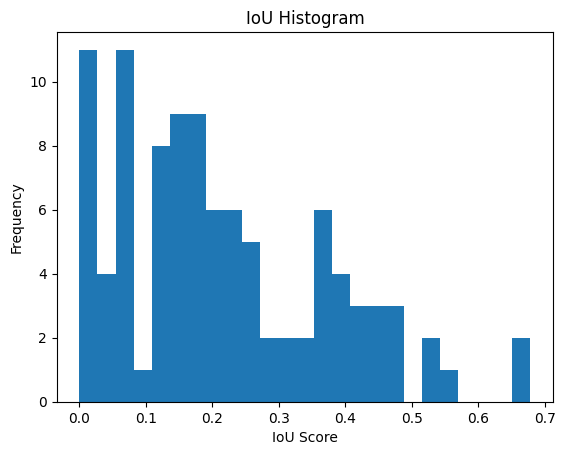

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_iou(rect1, rect2):
    # Calculate intersection coordinates
    x_left = max(rect1[0], rect2[0])
    y_top = max(rect1[1], rect2[1])
    x_right = min(rect1[0] + rect1[2], rect2[0] + rect2[2])
    y_bottom = min(rect1[1] + rect1[3], rect2[1] + rect2[3])
    # Calculate intersection area
    intersection_area = max(0, x_right - x_left) * max(0, y_bottom - y_top)
    # Calculate union area
    union_area = rect1[2] * rect1[3] + rect2[2] * rect2[3] - intersection_area
    # Calculate IoU
    iou = intersection_area / union_area
    return iou

# Calculate IoU scores for each pair of ground truth and predicted rectangles
iou_scores = [calculate_iou(gt_rect, pred_rect) for gt_rect, pred_rect in zip(gt, pred)]

# Plotting the histogram
plt.hist(iou_scores, bins=25)
plt.title('IoU Histogram')
plt.xlabel('IoU Score')
plt.ylabel('Frequency')
plt.show()


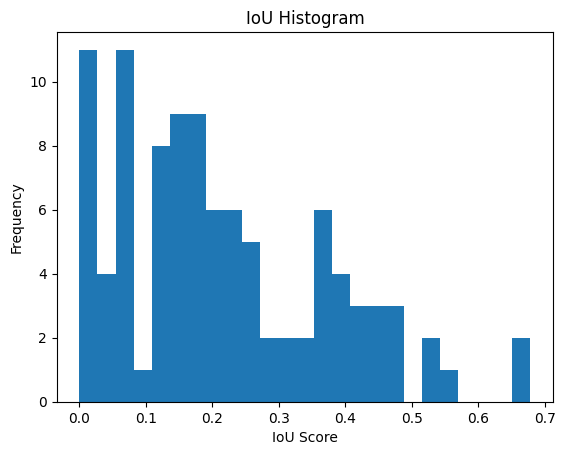

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_iou(rect1, rect2):
    # Calculate intersection coordinates
    x_left = max(rect1[0], rect2[0])
    y_top = max(rect1[1], rect2[1])
    x_right = min(rect1[0] + rect1[2], rect2[0] + rect2[2])
    y_bottom = min(rect1[1] + rect1[3], rect2[1] + rect2[3])
    
    intersection_area = max(0, x_right - x_left) * max(0, y_bottom - y_top)
    union_area = rect1[2] * rect1[3] + rect2[2] * rect2[3] - intersection_area
    iou = intersection_area / union_area
    return iou

iou_scores = [calculate_iou(gt_rect, pred_rect) for gt_rect, pred_rect in zip(gt, pred)]

plt.hist(iou_scores, bins=25)
plt.title('IoU Histogram')
plt.xlabel('IoU Score')
plt.ylabel('Frequency')
plt.show()


In [16]:
dataset_folder = r'C:\Alap\Programming\_Python_files\Semester1\DSSS\dsss_homeworks\Assignments\Assignment 6\Mini_BAGLS_dataset\Mini_BAGLS_dataset'
image_files = [f for f in os.listdir(dataset_folder) if f.endswith('.png') and not f.endswith('_seg.png')]
seg_files = [f for f in os.listdir(dataset_folder) if f.endswith('_seg.png')]
meta = [f for f in os.listdir(dataset_folder) if f.endswith('.meta')]
print(dataset_folder)

C:\Alap\Programming\_Python_files\Semester1\DSSS\dsss_homeworks\Assignments\Assignment 6\Mini_BAGLS_dataset\Mini_BAGLS_dataset


In [17]:
#Sorting in ascending order
def numerical_sort(file_list):
    return sorted(file_list, key=lambda x: int(x.split('_')[0].replace('.png', '')))

def sort_meta(file_list):
    return sorted(file_list, key=lambda x: int(x.split('_')[0].replace('.meta', '')) if '.meta' in x else x)

image_files = numerical_sort(image_files)
seg_files = numerical_sort(seg_files)
meta = sort_meta(meta)

In [23]:
import albumentations as alb

np.random.seed(233514299)
randimg = np.random.choice(image_files)

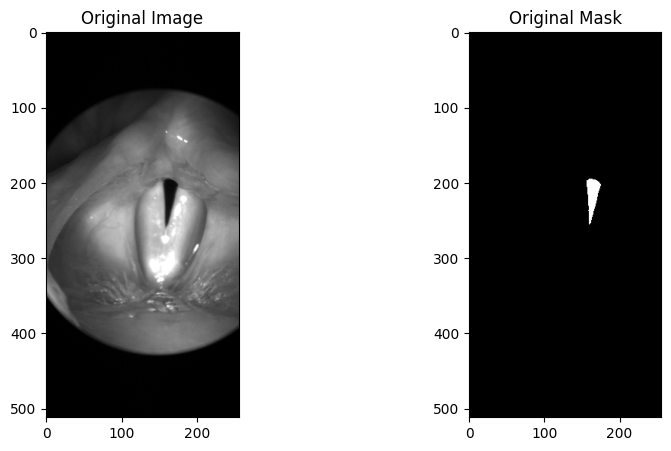

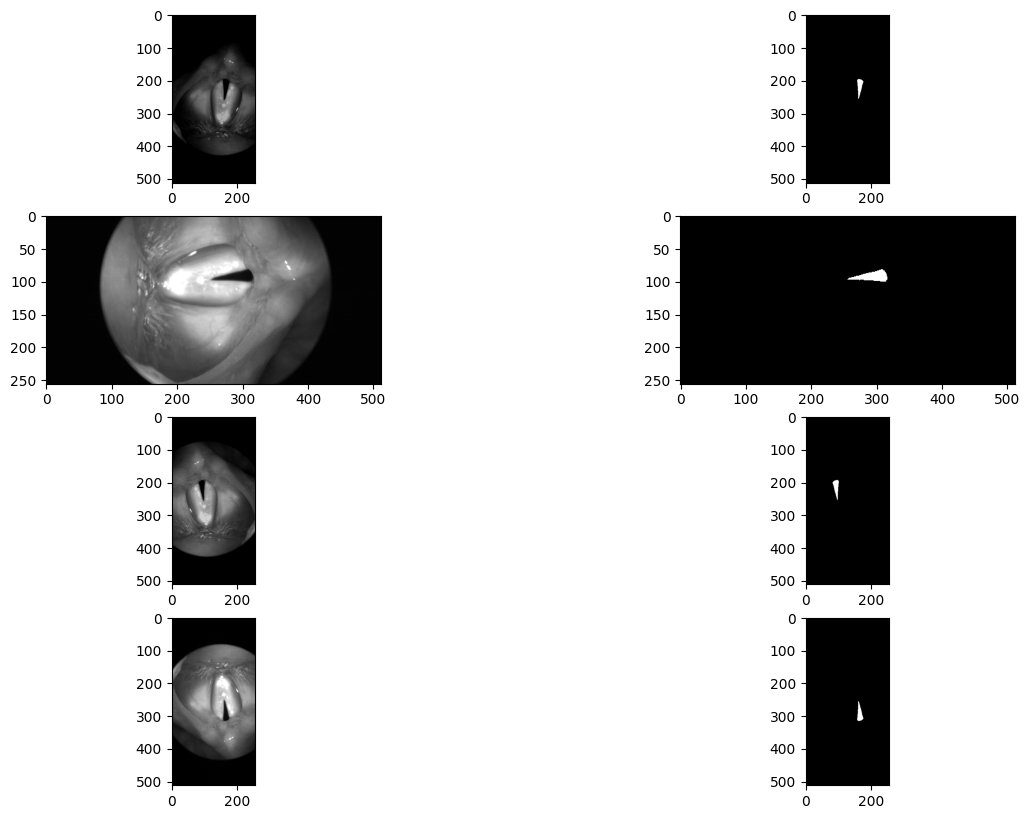

In [24]:
import os
import cv2
import numpy as np
import albumentations as alb
from matplotlib import pyplot as plt

# Define the paths to the original image and its mask
original_image_path = os.path.join(dataset_folder, randimg)
mask_image_path = os.path.join(dataset_folder, randimg.replace('.png', '_seg.png'))

# Read the original image and its mask
original_image = cv2.imread(original_image_path)
mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

# Define the data augmentation pipeline
augmentation_pipeline = alb.Compose([
    alb.HorizontalFlip(),
    alb.VerticalFlip(),
    alb.RandomRotate90(),
    alb.RandomBrightnessContrast(),
    # Add more augmentation techniques as needed
])

# Apply the augmentation to the image and mask
augmented = augmentation_pipeline(image=original_image, mask=mask_image)
augmented_image = augmented['image']
augmented_mask = augmented['mask']

# Plot the original image with its mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mask_image, cmap='gray')
plt.title('Original Mask')

plt.show()

# Plot 4 transformed images with their masks
plt.figure(figsize=(15, 10))

for i in range(4):
    augmented = augmentation_pipeline(image=original_image, mask=mask_image)
    augmented_image = augmented['image']
    augmented_mask = augmented['mask']

    plt.subplot(4, 2, i * 2 + 1)
    plt.imshow(augmented_image)
    # plt.title(f'Transformed Image {i + 1}')

    plt.subplot(4, 2, i * 2 + 2)
    plt.imshow(augmented_mask, cmap='gray')
    # plt.title(f'Transformed Mask {i + 1}')

plt.show()
